In [1]:
import sys
from pathlib import Path
import os
sys.path.append('../')
from pma_open import *

file_path = "../new files _24_3_25/hel1.pma"
generate_images(file_path)
generate_mp4('hel1_Files', 100)

Directory already exists: hel1_Files
Directory already exists: hel1_Files/hel1_Video


Image Size: 512 x 512
Sucessfully generated average frame


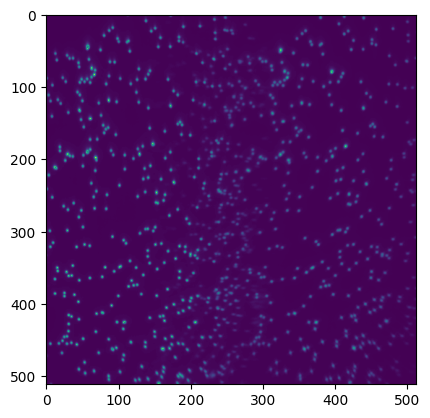

In [2]:
avg_frame_data = avg_frame_arr(file_path)
image_path = "hel1_Avg/hel1_Avg_Frame.png"
# Image.fromarray(avg_frame_data).save(image_path)
plt.imshow(avg_frame_data)

In [3]:
#Chanel image paths
CH1_img_path = "hel1_Avg/hel1_Avg_Frame_CH1.png"
CH2_img_path = "hel1_AVg/hel1_Avg_Frame_CH2.png"

avg_frame_data_CH1 = avg_frame_data[:,:256]
avg_frame_data_CH2 = avg_frame_data[:,256:]

# Image.fromarray(avg_frame_data_CH1).save(CH1_img_path)
# Image.fromarray(avg_frame_data_CH2).save(CH2_img_path)

image_CH1 = io.imread(CH1_img_path, as_gray=True)
image_CH2 = io.imread(CH2_img_path, as_gray=True)

peaks_coords_IDL_CH1 = find_peaks_scipy_IDL(CH1_img_path)[0]
peaks_coords_IDL_CH2 = find_peaks_scipy_IDL(CH2_img_path)[0]

In [4]:
# Move good_peaks_1 to CH2 to display full image
good_peaks_1,_ = good_peak_finder(CH1_img_path)
peaks_coords_IDL_CH2_new = find_peaks_scipy_IDL(CH2_img_path, sigma=2, block_size=16, scaler_percent=10)[0]
good_peaks_2_new,_ = good_peak_finder(CH2_img_path)

good_peaks_1_CH2 = shift_peaks(good_peaks_1)
good_peaks_2_CH2 = shift_peaks(good_peaks_2_new)

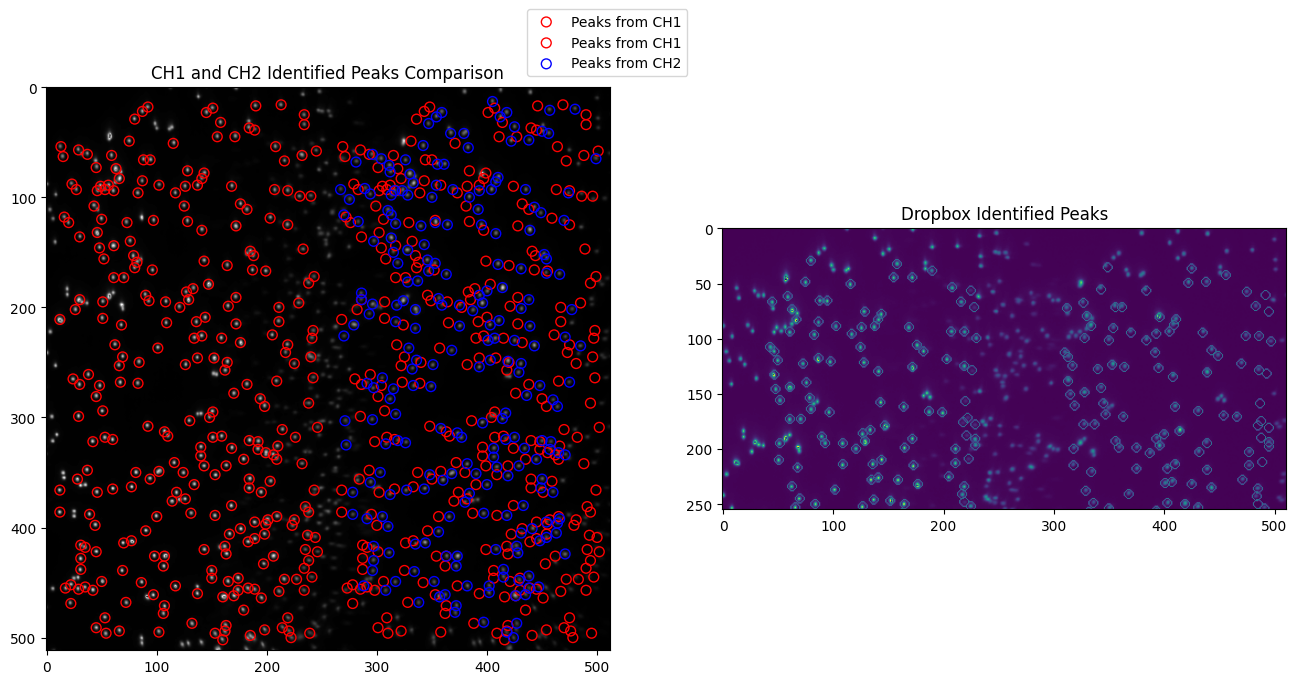

In [5]:
#All in one image!
hel1_ave_image_path = "../new files _24_3_25/hel1_ave_LF_Circ.tif"
hel1_ave_image = io.imread(hel1_ave_image_path)

image= io.imread(image_path, as_gray=True)

f, axes = plt.subplots(1, 2, figsize=(16, 24))
axes[0].set_title("CH1 and CH2 Identified Peaks Comparison")
axes[0].imshow(image, cmap="gray")
axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
axes[0].scatter(good_peaks_1_CH2[:, 1], good_peaks_1_CH2[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
axes[0].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.15, 1.15))

axes[1].set_title("Dropbox Identified Peaks")
axes[1].imshow(hel1_ave_image)
plt.show()

Number of peaks identified in CH1: 285
Number of peaks identified in CH2: 232


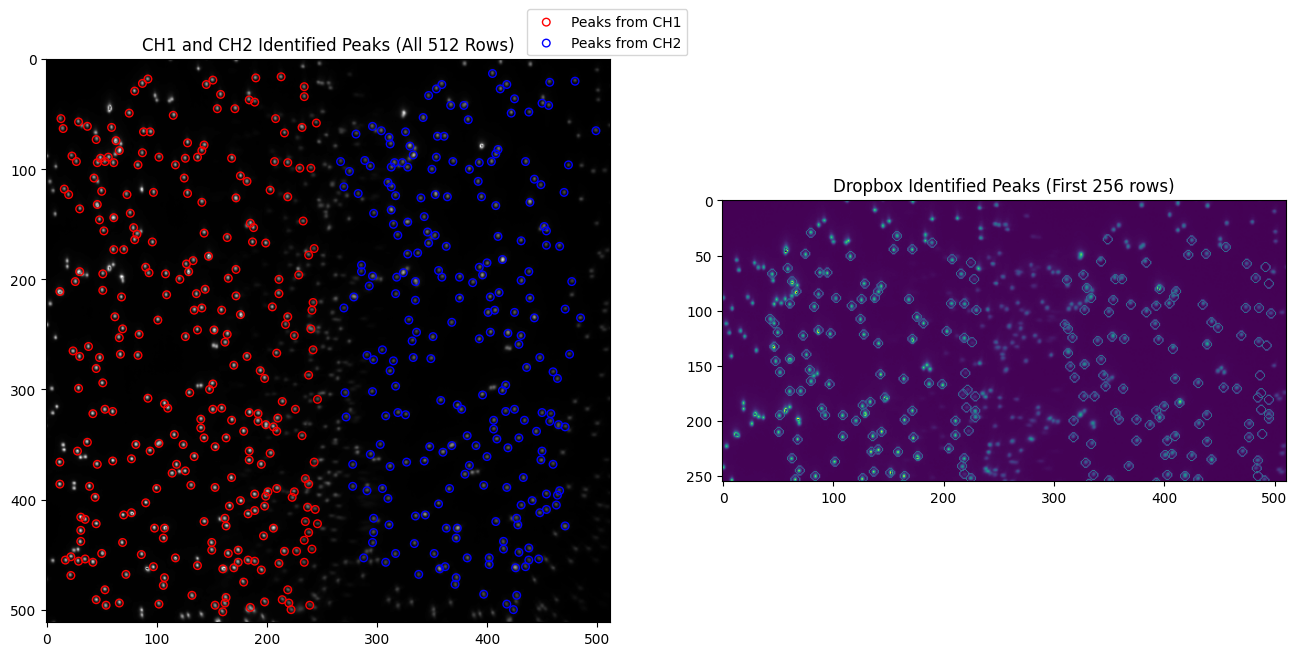

In [6]:
#All in one image!
print(f"Number of peaks identified in CH1: {len(good_peaks_1)}")
print(f"Number of peaks identified in CH2: {len(good_peaks_2_CH2)}")

f, axes = plt.subplots(1, 2, figsize=(16, 24))
axes[0].set_title("CH1 and CH2 Identified Peaks (All 512 Rows)")
axes[0].imshow(image, cmap="gray")
scat1= axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=30, facecolors='none', edgecolors='r', label='Peaks from CH1')
scat2= axes[0].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=30, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.15, 1.1))

axes[1].set_title("Dropbox Identified Peaks (First 256 rows)")
axes[1].imshow(hel1_ave_image)
plt.show()

# Manually Selected 10 peak pairs
##### CH1_Peak156 (y, x):(22,87), CH2_Peak58 (y, x):(23,359)
##### CH1_Peak241 (y, x):(16,213), CH2_Peak189 (y, x):(20,480)
##### CH1_Peak177 (y, x):(108,43), CH2_Peak60 (y, x):(112,310)
##### CH1_Peak145 (y, x):(106,176), CH2_Peak53 (y, x):(109,443)
##### CH1_Peak129 (y, x):(210,51), CH2_Peak217 (y, x):(213,317)
##### CH1_Peak227 (y, x):(234,219), CH2_Peak151 (y, x):(235,485)
##### CH1_Peak36 (y, x):(366,12), CH2_Peak174 (y, x):(368,278)
##### CH1_Peak126 (y, x):(322,192), CH2_Peak213 (y, x):(322,458)
##### CH1_Peak106 (y, x):(478,106), CH2_Peak176 (y, x):(477,371)
##### CH1_Peak217 (y, x):(502,160), CH2_Peak219 (y, x):(500,424)

X-Mapping Parameters: [ 1.40249323e-06 -4.17604040e-04  1.02809700e+00  2.65896256e+02]
Y-Mapping Parameters: [-6.43405067e-08  4.42739164e-05  9.80836912e-01  4.90618214e+00]


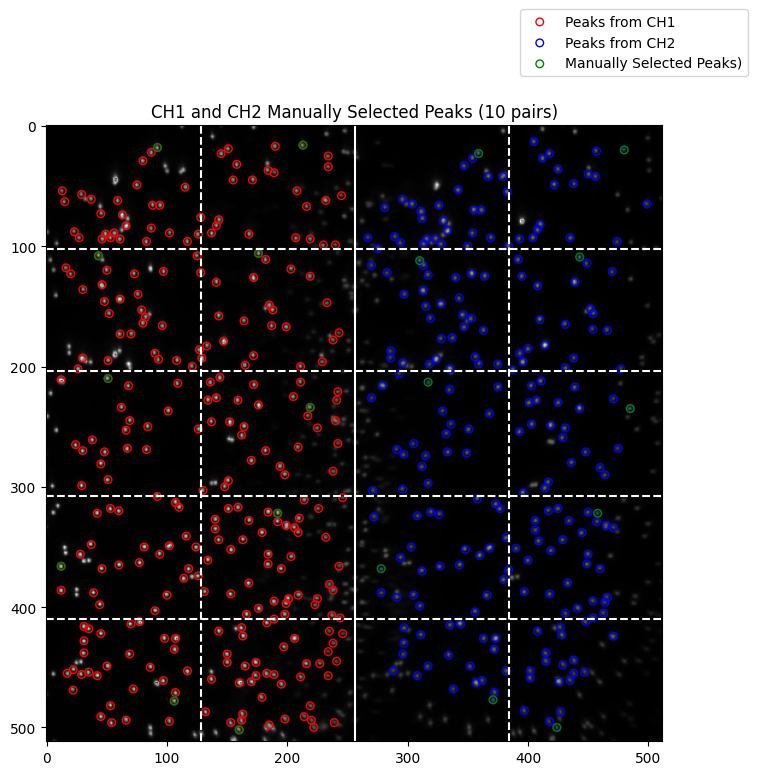

In [7]:
CH1_peaks_10= np.array([[18,92], [16,213], [108,43], [106, 176], [210,51], [234, 219], [366,12], [322,192], [478, 106], [502,160]])
CH2_peaks_10 = np.array([[23,359],[20,480],[112,310],[109,443],[213,317],[235,485],[368,278],[322,458],[477,371],[500,424]])
params_x_man_10, params_y_man_10 = find_polyfit_params(CH1_peaks_10, CH2_peaks_10, degree=3)
print("X-Mapping Parameters:", params_x_man_10)
print("Y-Mapping Parameters:", params_y_man_10)
plt.figure(figsize=(8, 8))
plt.title("CH1 and CH2 Manually Selected Peaks (10 pairs)")
plt.imshow(image, cmap="gray")
plt.axhline(y= 102, color='w', linestyle='--')  
plt.axhline(y= 204, color='w', linestyle='--')
plt.axhline(y= 308, color='w', linestyle='--')
plt.axhline(y= 410, color='w', linestyle='--')

plt.axvline(x= 128, color='w', linestyle='--')
plt.axvline(x= 384, color='w', linestyle='--')

plt.axvline(x= 256, color='w', linestyle='-')
plt.scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=30, facecolors='none', edgecolors='r', label='Peaks from CH1')
plt.scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=30, facecolors='none', edgecolors='b', label='Peaks from CH2')
plt.scatter(CH1_peaks_10[:, 1], CH1_peaks_10[:, 0], s=30, facecolors='none', edgecolors='g', label='Manually Selected Peaks)')
plt.scatter(CH2_peaks_10[:, 1], CH2_peaks_10[:, 0], s=30, facecolors='none', edgecolors='g')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.2))

plt.show()

In [8]:
mapped_peaks_10 = apply_polyfit_params(good_peaks_1, params_x_man_10, params_y_man_10).astype(np.uint16)
poly_pair_count_tol4_10, poly_pair_arr_CH1_tol4_10, poly_pair_arr_CH2_tol4_10 = find_polyfit_pairs(mapped_peaks_10, good_peaks_1, tolerance=4)
print(f"Number of Polynomial pairs (tolerance=4): {poly_pair_count_tol4_10}")

Number of Polynomial pairs (tolerance=4): 47


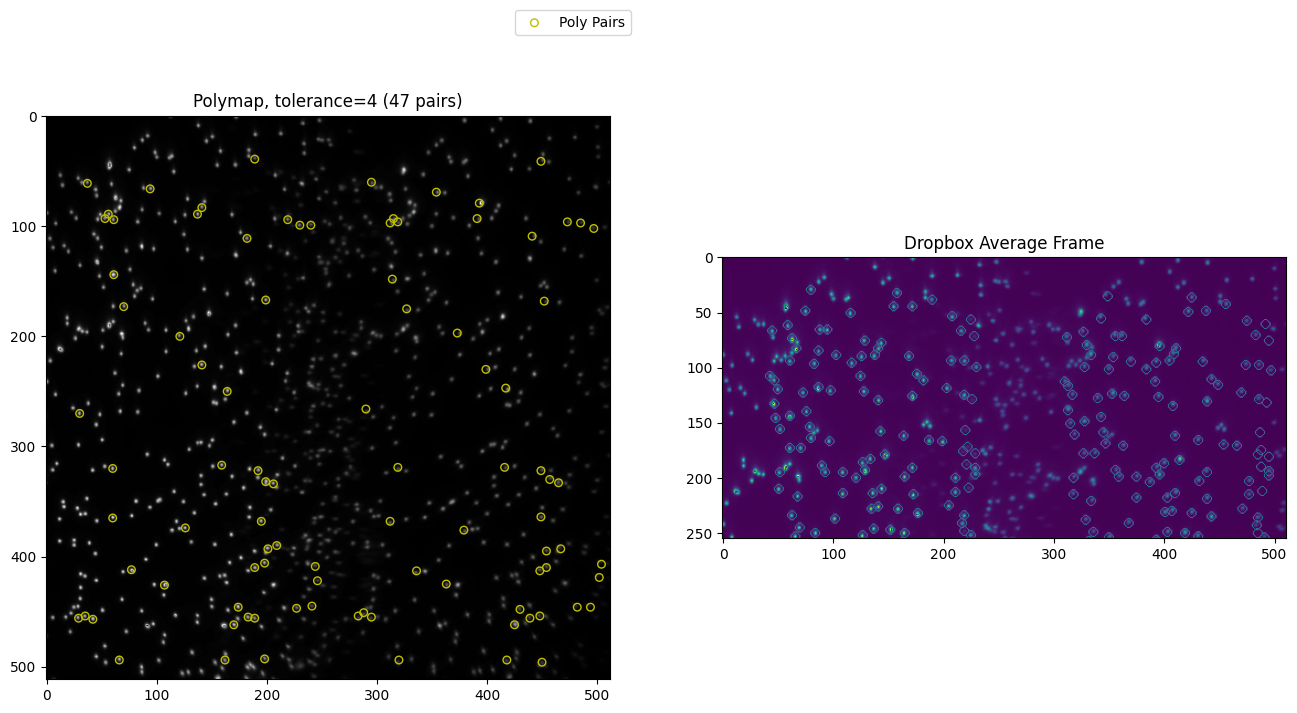

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16, 48))
axes[0].imshow(image, cmap="gray")
axes[0].set_title(f"Polymap, tolerance=4 ({poly_pair_count_tol4_10} pairs)")
# axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
# axes[0].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[0].scatter(poly_pair_arr_CH1_tol4_10[:, 1], poly_pair_arr_CH1_tol4_10[:, 0], s=30, facecolors='none', edgecolors='y', label='Poly Pairs')
axes[0].scatter(poly_pair_arr_CH2_tol4_10[:, 1], poly_pair_arr_CH2_tol4_10[:, 0], s=30, facecolors='none', edgecolors='y')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.05, 1.2))

axes[1].imshow(hel1_ave_image)
axes[1].set_title("Dropbox Average Frame")
plt.show()

# Must try some sort of linear shift before polynomial shift

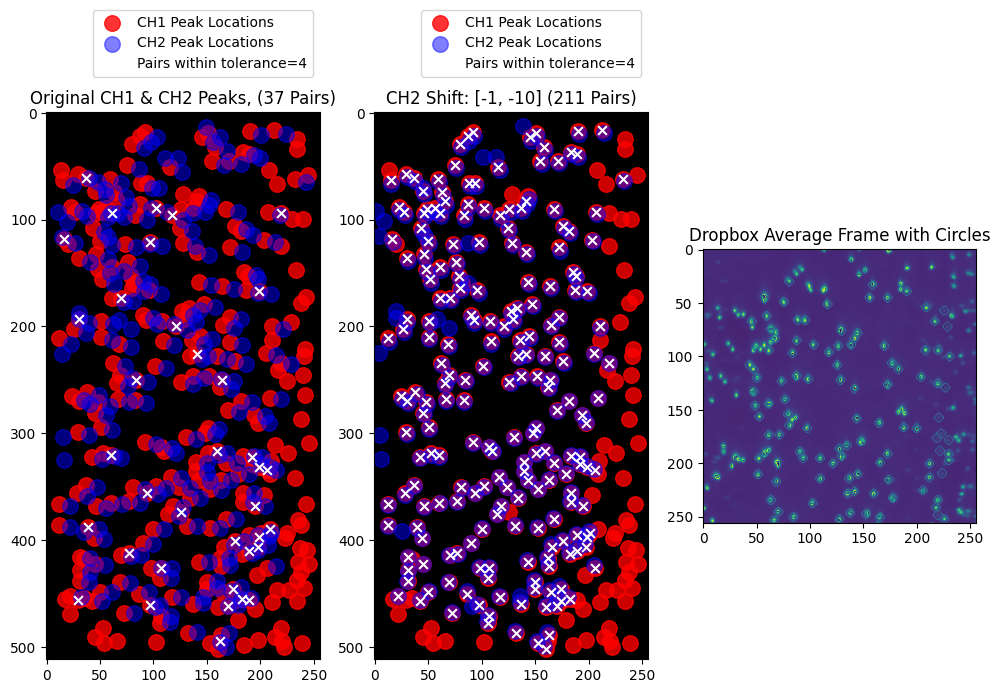

In [10]:
avg_overlayed = ((avg_frame_data_CH1 + avg_frame_data_CH2) / 2).astype(np.uint8)
Overlay_img_path = "hel1_Avg/hel1_Avg_Frame_Overlay.png"
# io.imsave(Overlay_img_path, avg_overlayed)
overlay_img = io.imread(Overlay_img_path)

average_circ_DB_image = io.imread("../new files _24_3_25/hel1_ave_Merg_Circ.tif")

poly_pair_arr_CH2_tol4_10_CH1 = shift_peaks(poly_pair_arr_CH2_tol4_10, [0, -256])
mapped_peaks_10_CH1 = shift_peaks(mapped_peaks_10, [0, -256])

shift = [-1, -10]
tolerance=4
good_peaks_2_shift = shift_peaks(good_peaks_2_new, shift=shift)

found_pairs_noshift_count, found_pairs_noshift,_ = find_linear_pairs(good_peaks_1, good_peaks_2_new, tolerance=tolerance, width=256)
found_pairs_shift_count, found_pairs_shift,_= find_linear_pairs(good_peaks_1, good_peaks_2_shift, tolerance=tolerance, width=256)

fig, axes = plt.subplots(1,3, figsize=(12, 10))


axes[0].imshow(np.zeros_like(overlay_img), cmap="gray")
axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=500, marker= ".", alpha=0.8, color='r', label='CH1 Peak Locations')
axes[0].scatter(good_peaks_2_new[:, 1], good_peaks_2_new[:, 0], s=500, marker=".", alpha=0.5, color='b', label='CH2 Peak Locations')
axes[0].scatter(found_pairs_noshift[:,1], found_pairs_noshift[:,0], s=40, marker="x", color='w', label=f'Pairs within tolerance={tolerance}')
axes[0].set_title(f"Original CH1 & CH2 Peaks, ({found_pairs_noshift_count} Pairs)")
axes[0].legend(loc='upper right', bbox_to_anchor=(1, 1.2))

axes[1].imshow(np.zeros_like(overlay_img), cmap="gray")
axes[1].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=500, marker= ".", alpha=0.8, color='r', label='CH1 Peak Locations')
axes[1].scatter(good_peaks_2_shift[:, 1], good_peaks_2_shift[:, 0], s=500, marker=".", alpha=0.5, color='b', label='CH2 Peak Locations')
axes[1].scatter(found_pairs_shift[:,1], found_pairs_shift[:,0], s=40, marker="x", color='w', label=f'Pairs within tolerance={tolerance}')
axes[1].set_title(f"CH2 Shift: {shift} ({found_pairs_shift_count} Pairs)")
axes[1].legend(loc='upper right', bbox_to_anchor=(1, 1.2))

axes[2].imshow(average_circ_DB_image)
axes[2].set_title("Dropbox Average Frame with Circles")
plt.show()

#### After shifting CH2 [-1,-10] we are getting significantly more pairs!! We could get more pairs after completing a polynomial fit
##### CH2_Peak58 (y, x):(22,349), CH2_Peak189 (y, x):(19,470), CH2_Peak60 (y, x):(111,300)
##### CH2_Peak53 (y, x):(108,433), CH2_Peak217 (y, x):(212,307), CH2_Peak151 (y, x):(234,475)
##### CH2_Peak174 (y, x):(367,268), CH2_Peak213 (y, x):(321,448), CH2_Peak176 (y, x):(476,361), CH2_Peak219 (y, x):(499,414)

In [13]:
#new coords for CH2:
CH1_peaks_10 = np.array([[18,92], [16,213], [108,43], [106, 176], [210,51], [234, 219], [366,12], [322,192], [478, 106], [502,160]])
CH2_peaks_10_new = np.array([[22,349],[19,470],[111,300],[108,433],[212,307],[234,475],[367,268],[321,448],[476,361],[499,414]])
params_x_man_10_new, params_y_man_10_new = find_polyfit_params(CH1_peaks_10, CH2_peaks_10_new, degree=3)
mapped_peaks_10_new = apply_polyfit_params(good_peaks_1, params_x_man_10_new, params_y_man_10_new).astype(np.uint16)
poly_pair_count_tol4_10_new, poly_pair_arr_CH1_tol4_10_new, poly_pair_arr_CH2_tol4_10_new = find_polyfit_pairs(mapped_peaks_10_new, good_peaks_1, tolerance=3)

poly_pair_arr_CH2_tol4_10_new_unshift = shift_peaks(poly_pair_arr_CH2_tol4_10_new, [1, 10])
# remove poly_pair_arr_CH2_tol4_10_new_unshift that have an x-value greater than 502
# remove the corresponding peaks from poly_pair_arr_CH1_tol4_10_new

poly_pair_arr_CH2_tol4_10_curr = poly_pair_arr_CH2_tol4_10_new_unshift[poly_pair_arr_CH2_tol4_10_new_unshift[:,1] <= 502]
poly_pair_arr_CH1_tol4_10_curr = poly_pair_arr_CH1_tol4_10_new[poly_pair_arr_CH2_tol4_10_new_unshift[:,1] <= 502]
print(f"Number of Polynomial pairs (tolerance=4): {len(poly_pair_arr_CH2_tol4_10_curr)}")
print(f"Len CH1: {len(poly_pair_arr_CH1_tol4_10_curr)}")

Number of Polynomial pairs (tolerance=4): 266
Len CH1: 266


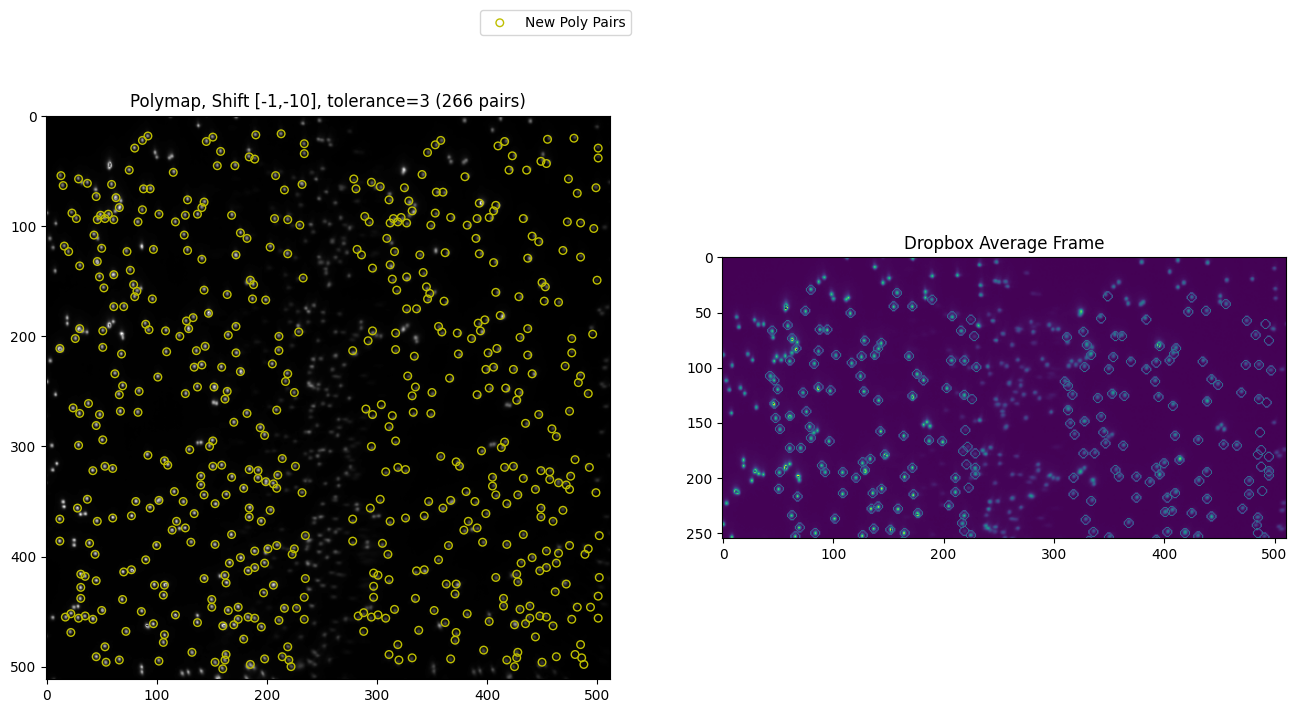

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 48))
axes[0].imshow(image, cmap="gray")
axes[0].set_title(f"Polymap, Shift [-1,-10], tolerance=3 ({len(poly_pair_arr_CH1_tol4_10_curr)} pairs)")
axes[0].scatter(poly_pair_arr_CH1_tol4_10_curr[:, 1], poly_pair_arr_CH1_tol4_10_curr[:, 0], s=30, facecolors='none', edgecolors='y', label='New Poly Pairs')
axes[0].scatter(poly_pair_arr_CH2_tol4_10_curr[:, 1], poly_pair_arr_CH2_tol4_10_curr[:, 0], s=30, facecolors='none', edgecolors='y')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.05, 1.2))

axes[1].imshow(hel1_ave_image)
axes[1].set_title("Dropbox Average Frame")
plt.show()

## Remove photobleaching peaks e.g. peaks whos counterpart has an intensity of <15% 
#### Example power point says this pma file has 226 molecules, we are currently at 266!